<a id='stochastic'></a> 
## Assignment 1: Training vs Testing Data by John Foxworthy

To assess the predictive accuracy of a model it is common practice to use a statistical methodology called cross-validation by splitting the sample data into two datasets called, respectively the training and testing data.   

You will estimate the model on the train data set and you will use your model to predict on the test data set.  
We will then assess the accuracy of your model using the actual values for the testing data.  

You do not have the actual values for the testing data.

Random is a sample solution so you can see the format expected by Kaggle and by me.  It is a really bad solution.


### Loading the data

In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
sns.set(style="whitegrid")
from matplotlib import pyplot as plt

%matplotlib inline
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings('ignore')

In [2]:
# Test set

df_test = pd.read_csv('moneyball_test.csv')

df_test = pd.DataFrame(df_test)

# Training set

df = pd.read_csv('moneyball_train.csv')

df = pd.DataFrame(df)

list(df.columns.values)

['Unnamed: 0',
 'INDEX',
 'TARGET_WINS',
 'TEAM_BATTING_H',
 'TEAM_BATTING_2B',
 'TEAM_BATTING_3B',
 'TEAM_BATTING_HR',
 'TEAM_BATTING_BB',
 'TEAM_BATTING_SO',
 'TEAM_BASERUN_SB',
 'TEAM_BASERUN_CS',
 'TEAM_BATTING_HBP',
 'TEAM_PITCHING_H',
 'TEAM_PITCHING_HR',
 'TEAM_PITCHING_BB',
 'TEAM_PITCHING_SO',
 'TEAM_FIELDING_E',
 'TEAM_FIELDING_DP']

In [3]:
# Data variable dimensions
df.shape

(2276, 18)

In [4]:
len(df.columns)

18

### First Look at the 18 columns of the Training Set

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe(include='all')

,Unnamed: 0,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
count,"2,276.00","2,276.00","2,276.00","2,276.00","2,276.00","2,276.00","2,276.00","2,276.00","2,174.00","2,145.00","1,504.00",191.00,"2,276.00","2,276.00","2,276.00","2,174.00","2,276.00","1,990.00"
mean,"1,137.50","1,268.46",80.79,"1,469.27",241.25,55.25,99.61,501.56,735.61,124.76,52.80,59.36,"1,779.21",105.70,553.01,817.73,246.48,146.39
std,657.17,736.35,15.75,144.59,46.80,27.94,60.55,122.67,248.53,87.79,22.96,12.97,"1,406.84",61.30,166.36,553.09,227.77,26.23
min,0.00,1.00,0.00,891.00,69.00,0.00,0.00,0.00,0.00,0.00,0.00,29.00,"1,137.00",0.00,0.00,0.00,65.00,52.00
25%,568.75,630.75,71.00,"1,383.00",208.00,34.00,42.00,451.00,548.00,66.00,38.00,50.50,"1,419.00",50.00,476.00,615.00,127.00,131.00
50%,"1,137.50","1,270.50",82.00,"1,454.00",238.00,47.00,102.00,512.00,750.00,101.00,49.00,58.00,"1,518.00",107.00,536.50,813.50,159.00,149.00
75%,"1,706.25","1,915.50",92.00,"1,537.25",273.00,72.00,147.00,580.00,930.00,156.00,62.00,67.00,"1,682.50",150.00,611.00,968.00,249.25,164.00
max,"2,275.00","2,535.00",146.00,"2,554.00",458.00,223.00,264.00,878.00,"1,399.00",697.00,201.00,95.00,"30,132.00",343.00,"3,645.00","19,278.00","1,898.00",228.00


In [6]:
df.head(3)

,Unnamed: 0,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
0,0,1.00,39.00,"1,445.00",194.00,39.00,13.00,143.00,842.00,nan,nan,nan,"9,364.00",84.00,927.00,"5,456.00","1,011.00",nan
1,1,2.00,70.00,"1,339.00",219.00,22.00,190.00,685.00,"1,075.00",37.00,28.00,nan,"1,347.00",191.00,689.00,"1,082.00",193.00,155.00
2,2,3.00,86.00,"1,377.00",232.00,35.00,137.00,602.00,917.00,46.00,27.00,nan,"1,377.00",137.00,602.00,917.00,175.00,153.00


In [7]:
df.dtypes

Unnamed: 0            int64
INDEX               float64
TARGET_WINS         float64
TEAM_BATTING_H      float64
TEAM_BATTING_2B     float64
TEAM_BATTING_3B     float64
TEAM_BATTING_HR     float64
TEAM_BATTING_BB     float64
TEAM_BATTING_SO     float64
TEAM_BASERUN_SB     float64
TEAM_BASERUN_CS     float64
TEAM_BATTING_HBP    float64
TEAM_PITCHING_H     float64
TEAM_PITCHING_HR    float64
TEAM_PITCHING_BB    float64
TEAM_PITCHING_SO    float64
TEAM_FIELDING_E     float64
TEAM_FIELDING_DP    float64
dtype: object

<a id='stochastic'></a> 

No categorical variables and continuous variables with some missing. 

The first unnamed column is an enumeration of rows starting with integer 1 counting up to 2,276. 

### Missing Data Analysis

In [8]:
df.isnull()

,Unnamed: 0,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
0,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2274,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<a id='stochastic'></a> 

Dimensions are too big for the is null function to help with missing data so let's count . . . 

In [9]:
df.count()

Unnamed: 0          2276
INDEX               2276
TARGET_WINS         2276
TEAM_BATTING_H      2276
TEAM_BATTING_2B     2276
TEAM_BATTING_3B     2276
TEAM_BATTING_HR     2276
TEAM_BATTING_BB     2276
TEAM_BATTING_SO     2174
TEAM_BASERUN_SB     2145
TEAM_BASERUN_CS     1504
TEAM_BATTING_HBP     191
TEAM_PITCHING_H     2276
TEAM_PITCHING_HR    2276
TEAM_PITCHING_BB    2276
TEAM_PITCHING_SO    2174
TEAM_FIELDING_E     2276
TEAM_FIELDING_DP    1990
dtype: int64

<a id='stochastic'></a> 

Better with the count function to at least identify, but is there a pattern?  Pattern finding is a major purpose of Exploratory Data Analysis.

[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'INDEX'),
 Text(2.5, 0, 'TARGET_WINS'),
 Text(3.5, 0, 'TEAM_BATTING_H'),
 Text(4.5, 0, 'TEAM_BATTING_2B'),
 Text(5.5, 0, 'TEAM_BATTING_3B'),
 Text(6.5, 0, 'TEAM_BATTING_HR'),
 Text(7.5, 0, 'TEAM_BATTING_BB'),
 Text(8.5, 0, 'TEAM_BATTING_SO'),
 Text(9.5, 0, 'TEAM_BASERUN_SB'),
 Text(10.5, 0, 'TEAM_BASERUN_CS'),
 Text(11.5, 0, 'TEAM_BATTING_HBP'),
 Text(12.5, 0, 'TEAM_PITCHING_H'),
 Text(13.5, 0, 'TEAM_PITCHING_HR'),
 Text(14.5, 0, 'TEAM_PITCHING_BB'),
 Text(15.5, 0, 'TEAM_PITCHING_SO'),
 Text(16.5, 0, 'TEAM_FIELDING_E'),
 Text(17.5, 0, 'TEAM_FIELDING_DP')]

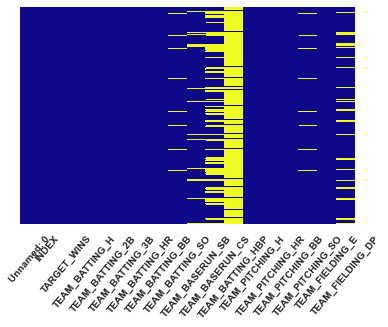

In [10]:
g = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')
g.set_xticklabels(g.get_xticklabels(), rotation=50, fontweight='bold', fontsize=10)

<a id='stochastic'></a> 

The above heatmap visual demonstrates a common tendency of missing data like a pattern.  There is not much of a skew in missing data for the following below.

TEAM_BATTING_HBP     Batters hit by pitch (get a free base)

TEAM_BASERUN_CS      Caught stealing

TEAM_FIELDING_DP     Double Plays

TEAM_BASERUN_SB      Stolen bases

TEAM_BATTING_SO      Strikeouts by batters

TEAM_PITCHING_SO     Strikeouts by pitchers

Ironically, the common tendency of missing data is about uncommon events.  I do not claim to know everything about baseball, but the above events are unusual, assuming the missing data is a zero value.  Professional baseball players can play many games, and the above uncommon events do not happen much.  For example, how many times does a batter get hit by the pitcher or a base is stolen?  Not often.  

I surmise the data collector carelessly leaves the datapoint empty when they should have placed a zero.  Imputing a median value would alter the reality of the data collection and exaggerate our Exploratory Data Analysis.  I will therefore fill in the missing data with zero values.

In [11]:
# just in case make a copy of the dataframe if we need to go back
df2 = df.copy()
df2.head(3)

,Unnamed: 0,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
0,0,1.00,39.00,"1,445.00",194.00,39.00,13.00,143.00,842.00,nan,nan,nan,"9,364.00",84.00,927.00,"5,456.00","1,011.00",nan
1,1,2.00,70.00,"1,339.00",219.00,22.00,190.00,685.00,"1,075.00",37.00,28.00,nan,"1,347.00",191.00,689.00,"1,082.00",193.00,155.00
2,2,3.00,86.00,"1,377.00",232.00,35.00,137.00,602.00,917.00,46.00,27.00,nan,"1,377.00",137.00,602.00,917.00,175.00,153.00


In [12]:
df2.fillna(0, inplace=True)

[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'INDEX'),
 Text(2.5, 0, 'TARGET_WINS'),
 Text(3.5, 0, 'TEAM_BATTING_H'),
 Text(4.5, 0, 'TEAM_BATTING_2B'),
 Text(5.5, 0, 'TEAM_BATTING_3B'),
 Text(6.5, 0, 'TEAM_BATTING_HR'),
 Text(7.5, 0, 'TEAM_BATTING_BB'),
 Text(8.5, 0, 'TEAM_BATTING_SO'),
 Text(9.5, 0, 'TEAM_BASERUN_SB'),
 Text(10.5, 0, 'TEAM_BASERUN_CS'),
 Text(11.5, 0, 'TEAM_BATTING_HBP'),
 Text(12.5, 0, 'TEAM_PITCHING_H'),
 Text(13.5, 0, 'TEAM_PITCHING_HR'),
 Text(14.5, 0, 'TEAM_PITCHING_BB'),
 Text(15.5, 0, 'TEAM_PITCHING_SO'),
 Text(16.5, 0, 'TEAM_FIELDING_E'),
 Text(17.5, 0, 'TEAM_FIELDING_DP')]

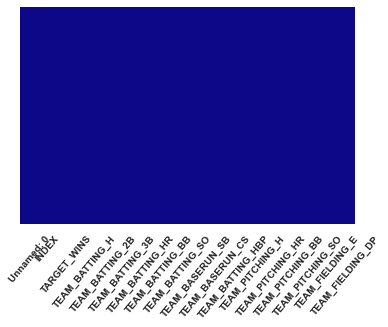

In [13]:
g = sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='plasma')
g.set_xticklabels(g.get_xticklabels(), rotation=50, fontweight='bold', fontsize=10)

<a id='stochastic'></a> 

We no longer have any missing data issues and can continue with our Exploratory Data Analysis.

In [14]:
# sanity check to see if we have the same dimensions as df.shape above 
df2.shape

(2276, 18)

In [15]:
df2.count()

Unnamed: 0          2276
INDEX               2276
TARGET_WINS         2276
TEAM_BATTING_H      2276
TEAM_BATTING_2B     2276
TEAM_BATTING_3B     2276
TEAM_BATTING_HR     2276
TEAM_BATTING_BB     2276
TEAM_BATTING_SO     2276
TEAM_BASERUN_SB     2276
TEAM_BASERUN_CS     2276
TEAM_BATTING_HBP    2276
TEAM_PITCHING_H     2276
TEAM_PITCHING_HR    2276
TEAM_PITCHING_BB    2276
TEAM_PITCHING_SO    2276
TEAM_FIELDING_E     2276
TEAM_FIELDING_DP    2276
dtype: int64

In [16]:
df2.mean()

Unnamed: 0         1,137.50
INDEX              1,268.46
TARGET_WINS           80.79
TEAM_BATTING_H     1,469.27
TEAM_BATTING_2B      241.25
TEAM_BATTING_3B       55.25
TEAM_BATTING_HR       99.61
TEAM_BATTING_BB      501.56
TEAM_BATTING_SO      702.64
TEAM_BASERUN_SB      117.58
TEAM_BASERUN_CS       34.89
TEAM_BATTING_HBP       4.98
TEAM_PITCHING_H    1,779.21
TEAM_PITCHING_HR     105.70
TEAM_PITCHING_BB     553.01
TEAM_PITCHING_SO     781.08
TEAM_FIELDING_E      246.48
TEAM_FIELDING_DP     127.99
dtype: float64

<a id='stochastic'></a>

We have variety in our values for arithmetic means so let's have a visual . . . 

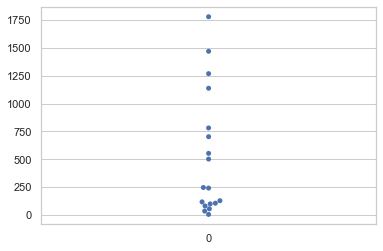

In [17]:
sns.swarmplot(data=df2.mean())            

<a id='stochastic'></a>

The above swarm plot is adjusted for overlapping values and demonstrates the dispersion of arithmetic mean values. 

In [18]:
df2.median()

Unnamed: 0         1,137.50
INDEX              1,270.50
TARGET_WINS           82.00
TEAM_BATTING_H     1,454.00
TEAM_BATTING_2B      238.00
TEAM_BATTING_3B       47.00
TEAM_BATTING_HR      102.00
TEAM_BATTING_BB      512.00
TEAM_BATTING_SO      728.00
TEAM_BASERUN_SB       97.00
TEAM_BASERUN_CS       38.00
TEAM_BATTING_HBP       0.00
TEAM_PITCHING_H    1,518.00
TEAM_PITCHING_HR     107.00
TEAM_PITCHING_BB     536.50
TEAM_PITCHING_SO     797.00
TEAM_FIELDING_E      159.00
TEAM_FIELDING_DP     145.00
dtype: float64

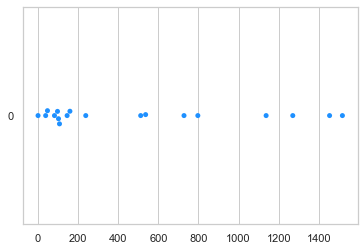

In [19]:
sns.swarmplot(data=df2.median(), color='dodgerblue', orient='h')            

In [20]:
df2.std()

Unnamed: 0           657.17
INDEX                736.35
TARGET_WINS           15.75
TEAM_BATTING_H       144.59
TEAM_BATTING_2B       46.80
TEAM_BATTING_3B       27.94
TEAM_BATTING_HR       60.55
TEAM_BATTING_BB      122.67
TEAM_BATTING_SO      286.65
TEAM_BASERUN_SB       90.05
TEAM_BASERUN_CS       31.20
TEAM_BATTING_HBP      16.88
TEAM_PITCHING_H    1,406.84
TEAM_PITCHING_HR      61.30
TEAM_PITCHING_BB     166.36
TEAM_PITCHING_SO     566.41
TEAM_FIELDING_E      227.77
TEAM_FIELDING_DP      54.38
dtype: float64

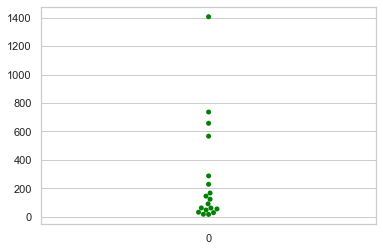

In [21]:
sns.swarmplot(data=df2.std(), color='green')   

In [22]:
df2.skew()

Unnamed: 0          0.00
INDEX               0.00
TARGET_WINS        -0.40
TEAM_BATTING_H      1.57
TEAM_BATTING_2B     0.22
TEAM_BATTING_3B     1.11
TEAM_BATTING_HR     0.19
TEAM_BATTING_BB    -1.03
TEAM_BATTING_SO    -0.60
TEAM_BASERUN_SB     1.81
TEAM_BASERUN_CS     0.79
TEAM_BATTING_HBP    3.27
TEAM_PITCHING_H    10.34
TEAM_PITCHING_HR    0.29
TEAM_PITCHING_BB    6.75
TEAM_PITCHING_SO   19.81
TEAM_FIELDING_E     2.99
TEAM_FIELDING_DP   -1.44
dtype: float64

In [23]:
# Shapiro - Wilk Test

from scipy.stats import shapiro

# normality test
stat, p = shapiro(df2)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.648, p=0.000
Sample does not look Gaussian (reject H0)


<a id='stochastic'></a>

The mean, median, standard deviation and skew demonstrate a variety of values and the values are in a non - normal distribution. The Shapiro - Wilk test does reject the hypothesis test as the p value is zero so we do not have a normal distribution in our dataset.     

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

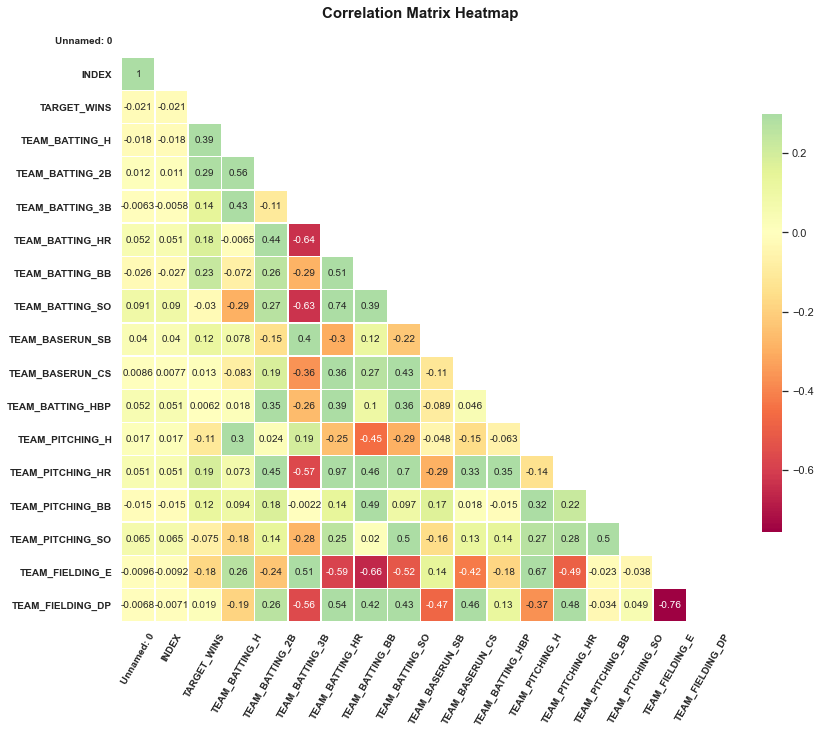

In [24]:
# Generate a correlation matrix function and assign it
corr = df2.corr()

# Generate an upper triangle mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask, correct aspect ratio and Spectral color theme
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 10}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .7})

# Make it readable and nice
plt.yticks(rotation=0, fontweight='bold', fontsize=10)
plt.xticks(rotation=60, fontweight='bold', fontsize=10)
plt.title('Correlation Matrix Heatmap', fontweight='bold', fontsize=15,color='k')

<a id='stochastic'></a> 

The shades of yellow with correlation values near zero, whether positive or negative, show indifference.  This is good because the non - yellow colors demonstrate inverse or tandem relationships that may cause issues with multicollinearity.  Redundant contributors to our model may raise a concern on accuracy.

### Assign the variables to begin cross validation analysis

In [25]:
y = df2['TARGET_WINS'] 

In [26]:
y

0      39.00
1      70.00
2      86.00
3      70.00
4      82.00
        ... 
2271   83.00
2272   67.00
2273   81.00
2274   71.00
2275   31.00
Name: TARGET_WINS, Length: 2276, dtype: float64

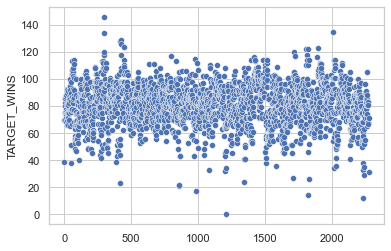

In [27]:
sns.scatterplot(data=y)

In [28]:
feature_cols = ['TEAM_BATTING_H', 'TEAM_BATTING_2B','TEAM_BATTING_3B',
                'TEAM_BATTING_HR', 'TEAM_BATTING_BB','TEAM_BATTING_SO',
                'TEAM_BASERUN_SB', 'TEAM_BASERUN_CS', 'TEAM_BATTING_HBP', 
                'TEAM_PITCHING_H', 'TEAM_PITCHING_HR', 'TEAM_PITCHING_BB',
               'TEAM_PITCHING_SO', 'TEAM_FIELDING_E', 'TEAM_FIELDING_DP']

In [29]:
X = df2[feature_cols]

In [30]:
X.head(3)

,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
0,"1,445.00",194.00,39.00,13.00,143.00,842.00,0.00,0.00,0.00,"9,364.00",84.00,927.00,"5,456.00","1,011.00",0.00
1,"1,339.00",219.00,22.00,190.00,685.00,"1,075.00",37.00,28.00,0.00,"1,347.00",191.00,689.00,"1,082.00",193.00,155.00
2,"1,377.00",232.00,35.00,137.00,602.00,917.00,46.00,27.00,0.00,"1,377.00",137.00,602.00,917.00,175.00,153.00


In [31]:
X.shape

(2276, 15)

In [32]:
# sanity checks
X.count()

TEAM_BATTING_H      2276
TEAM_BATTING_2B     2276
TEAM_BATTING_3B     2276
TEAM_BATTING_HR     2276
TEAM_BATTING_BB     2276
TEAM_BATTING_SO     2276
TEAM_BASERUN_SB     2276
TEAM_BASERUN_CS     2276
TEAM_BATTING_HBP    2276
TEAM_PITCHING_H     2276
TEAM_PITCHING_HR    2276
TEAM_PITCHING_BB    2276
TEAM_PITCHING_SO    2276
TEAM_FIELDING_E     2276
TEAM_FIELDING_DP    2276
dtype: int64

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 10-fold cross-validation with all three features
# instantiate model
lm = LinearRegression()

# store scores in scores object
# we can't use accuracy as our evaluation metric since that's only relevant for classification problems
# RMSE is not directly available so we will use MSE
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores.round(decimals=2))

[-176.4  -258.33 -137.2  -139.31 -123.84 -181.   -204.32 -218.85 -227.51
 -183.42]


<a id='stochastic'></a>

MSE or Mean Squared Error represents the difference between the original and predicted values extracted by squaring the average difference over the data set.  It is a loss function, and it is something we want to minimize when fitting a linear regression, i.e., how close a fitted line is to actual data points.  The lesser the Mean Squared Error, the closer the fit is to the data set.    

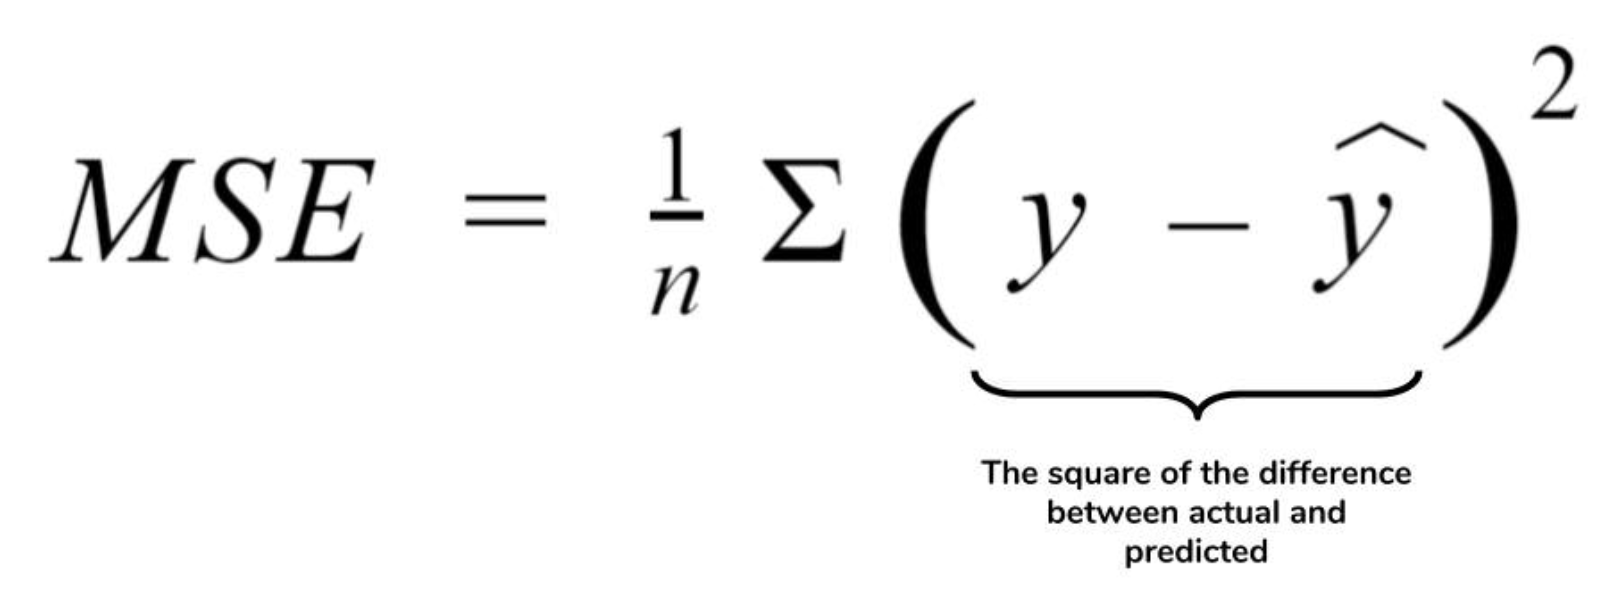

In [34]:
from IPython.display import Image
Image(filename="mse.png", width=600, height=600)

In [35]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores.round(decimals=2))

[176.4  258.33 137.2  139.31 123.84 181.   204.32 218.85 227.51 183.42]


In [36]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores.round(decimals=2))

[13.28 16.07 11.71 11.8  11.13 13.45 14.29 14.79 15.08 13.54]


In [37]:
# calculate the average RMSE
print(rmse_scores.mean().round(decimals=2))

13.52


<a id='stochastic'></a>

The Root Mean Squared Error or RMSE is the square root of the MSE, so it is always non - negative.  It is easier to interpret as the average distance of a data point from the fitted line, and it is a better measure of goodness of fit than a correlation coefficient.  The lower the RMSE, i.e., the closer it is to zero, the better it is than a higher one.

### First Look at the Test Set

In [64]:
list(df_test.columns.values)

['INDEX_pred',
 'INDEX',
 'TEAM_BATTING_H',
 'TEAM_BATTING_2B',
 'TEAM_BATTING_3B',
 'TEAM_BATTING_HR',
 'TEAM_BATTING_BB',
 'TEAM_BATTING_SO',
 'TEAM_BASERUN_SB',
 'TEAM_BASERUN_CS',
 'TEAM_BATTING_HBP',
 'TEAM_PITCHING_H',
 'TEAM_PITCHING_HR',
 'TEAM_PITCHING_BB',
 'TEAM_PITCHING_SO',
 'TEAM_FIELDING_E',
 'TEAM_FIELDING_DP']

In [65]:
df_test.count()

INDEX_pred          259
INDEX               259
TEAM_BATTING_H      259
TEAM_BATTING_2B     259
TEAM_BATTING_3B     259
TEAM_BATTING_HR     259
TEAM_BATTING_BB     259
TEAM_BATTING_SO     241
TEAM_BASERUN_SB     246
TEAM_BASERUN_CS     172
TEAM_BATTING_HBP     19
TEAM_PITCHING_H     259
TEAM_PITCHING_HR    259
TEAM_PITCHING_BB    259
TEAM_PITCHING_SO    241
TEAM_FIELDING_E     259
TEAM_FIELDING_DP    228
dtype: int64

### Will use 259 size to create the Data File below . . .

### Data File Test

In [67]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(lm, X, y, cv=10)

In [68]:
y_pred

array([61.88975334, 76.68825267, 77.41720321, ..., 70.3316618 ,
       78.57364936, 50.58461738])

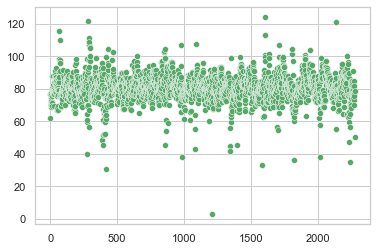

In [70]:
sns.scatterplot(data=y_pred, color='g')

In [71]:
y_pred.shape

(2276,)

In [72]:
y_pred2 = y_pred[:259]
y_pred2.shape

(259,)

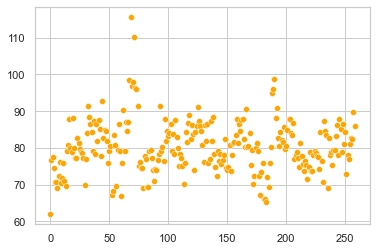

In [82]:
sns.scatterplot(data=y_pred2, color='orange')

### Going back to the original TEST dataframe with the first column called Unnamed and renaming it.

In [73]:
df_test.rename( columns={'Unnamed: 0':'INDEX_pred'}, inplace=True )

In [74]:
df_test

,INDEX_pred,INDEX,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
0,0,9.00,"1,209.00",170.00,33.00,83.00,447.00,"1,080.00",62.00,50.00,nan,"1,209.00",83.00,447.00,"1,080.00",140.00,156.00
1,1,10.00,"1,221.00",151.00,29.00,88.00,516.00,929.00,54.00,39.00,nan,"1,221.00",88.00,516.00,929.00,135.00,164.00
2,2,14.00,"1,395.00",183.00,29.00,93.00,509.00,816.00,59.00,47.00,nan,"1,395.00",93.00,509.00,816.00,156.00,153.00
3,3,47.00,"1,539.00",309.00,29.00,159.00,486.00,914.00,148.00,57.00,42.00,"1,539.00",159.00,486.00,914.00,124.00,154.00
4,4,60.00,"1,445.00",203.00,68.00,5.00,95.00,416.00,nan,nan,nan,"3,902.00",14.00,257.00,"1,123.00",616.00,130.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,"2,500.00","1,251.00",162.00,23.00,95.00,492.00,860.00,71.00,69.00,nan,"1,299.00",99.00,511.00,893.00,139.00,146.00
255,255,"2,501.00","1,345.00",190.00,23.00,125.00,695.00,777.00,77.00,68.00,nan,"1,345.00",125.00,695.00,777.00,163.00,156.00
256,256,"2,520.00","1,381.00",263.00,37.00,102.00,463.00,976.00,196.00,63.00,nan,"1,381.00",102.00,463.00,976.00,124.00,113.00
257,257,"2,521.00","1,410.00",270.00,36.00,122.00,542.00,860.00,228.00,56.00,nan,"1,410.00",122.00,542.00,860.00,159.00,144.00


In [75]:
target = df_test['INDEX_pred']
target

0        0
1        1
2        2
3        3
4        4
      ... 
254    254
255    255
256    256
257    257
258    258
Name: INDEX_pred, Length: 259, dtype: int64

In [76]:
len(y_pred2)

259

In [77]:
len(target)

259

In [78]:
pred_data = {'INDEX': target, 'P_TARGET_WINS': y_pred2}
pred_data

{'INDEX': 0        0
 1        1
 2        2
 3        3
 4        4
       ... 
 254    254
 255    255
 256    256
 257    257
 258    258
 Name: INDEX_pred, Length: 259, dtype: int64,
 'P_TARGET_WINS': array([ 61.88975334,  76.68825267,  77.41720321,  74.5539422 ,
         70.74640128,  70.66587347,  69.17818742,  72.40251966,
         76.27831717,  70.32496825,  71.69878954,  75.91806568,
         71.11651149,  69.66914528,  79.11281187,  80.87453583,
         87.97363549,  80.09035644,  78.83799458,  88.19511569,
         80.09197853,  77.24674736,  77.13593915,  82.58872427,
         81.29473134,  79.68246462,  78.84120617,  78.5014364 ,
         77.15166827,  69.77386084,  76.9303463 ,  84.06063269,
         91.30363329,  88.54871922,  86.4982167 ,  84.38311478,
         79.0563512 ,  87.43069189,  78.21724152,  86.50548086,
         81.99633345,  87.47359884,  85.23359261,  77.86853625,
         92.73447768,  82.82685549,  84.93413171,  84.49331666,
         82.01114584,  75.86

In [79]:
df_final = pd.DataFrame(pred_data, columns = ["INDEX", "P_TARGET_WINS"])
print(df_final)

     INDEX  P_TARGET_WINS
0        0          61.89
1        1          76.69
2        2          77.42
3        3          74.55
4        4          70.75
..     ...            ...
254    254          81.02
255    255          82.57
256    256          82.45
257    257          89.90
258    258          85.89

[259 rows x 2 columns]


In [81]:
df_final.to_csv('datafile_test_2.csv',index=False)